In [1]:
import tensorflow as ts
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
# from mlxtends.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


In [2]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

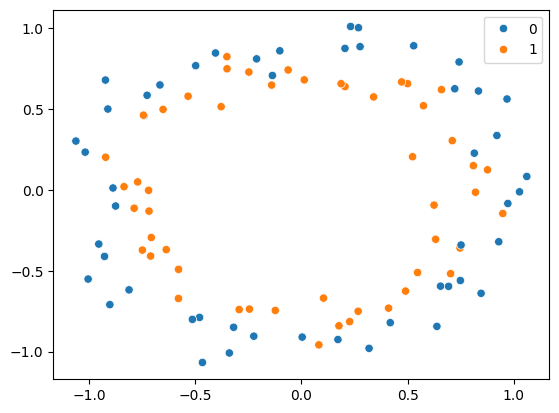

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=3500,verbose=0)

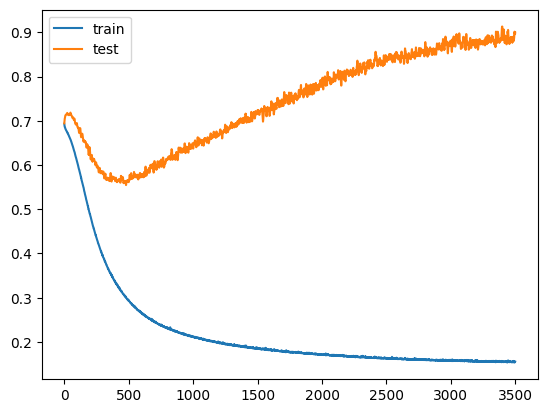

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [9]:
# Early Stopping
m = Sequential()
m.add(Dense(256,input_dim=2,activation='relu'))
m.add(Dense(1, activation='sigmoid'))

In [10]:
m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
callback = EarlyStopping(
    monitor='val_loss', # early stopping wrt to this
    min_delta=0.00001,
    patience=20, # no improvement till these epochs
    verbose=1, # to show output
    mode='auto', # auto min max 
    baseline=None,
    restore_best_weights=False # particular epoch got less loss
)

In [12]:
h = m.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5250 - loss: 0.6987 - val_accuracy: 0.6000 - val_loss: 0.6876
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4586 - loss: 0.7001 - val_accuracy: 0.6000 - val_loss: 0.6909
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4867 - loss: 0.6976 - val_accuracy: 0.6000 - val_loss: 0.6929
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4703 - loss: 0.6957 - val_accuracy: 0.5500 - val_loss: 0.6947
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4984 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4828 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6965
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5234 - loss: 0.6870 - val_accuracy: 0.4500 - val_loss: 0.6986
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4984 - loss: 0.6910 - val_accuracy: 0.4500 - 

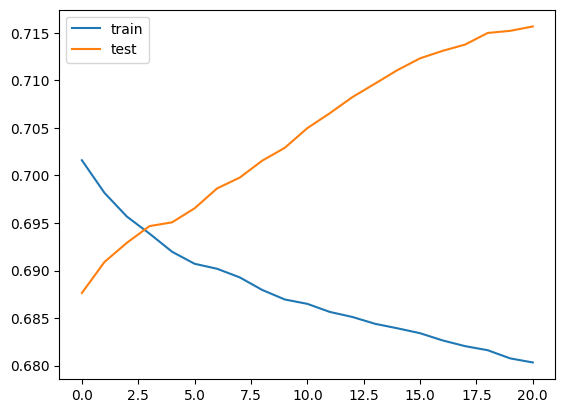

In [13]:
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# see the patience was 20 